# WeatherPy

---

In [23]:
%matplotlib inline

In [24]:
# Dependencies and Setup
from citipy import citipy
import numpy as np
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Import OpenWeatherMap API key
from api_key import weather_key

### Generate the Cities List by Using the `citipy` Library

In [25]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 607


---

## Showcase the relationship between different weather variables and Latitude. First...

### Retrieve weather data from the cities list

In [26]:

# Set the API base URL and units
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'metric'

# Empty list to store city weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{base_url}appid={weather_key}&units={units}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind_speed = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind_speed,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | karratha
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | port elizabeth
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | geraldton
Processing Record 9 of Set 1 | santa cruz de tenerife
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | sao filipe
Processing Record 12 of Set 1 | barrow
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | antofagasta
Processing Record 15 of Set 1 | alofi
Processing Record 16 of Set 1 | ahipara
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | ayer itam
City not found. Skipping...
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | castlegar
Processi

In [27]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show count and head to ensure accuracy
print(city_data_df.count())
city_data_df.head(10)

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,10.62,71,75,8.23,CL,1675642456
1,karratha,-20.7377,116.8463,32.70,48,3,0.95,AU,1675642872
2,rikitea,-23.1203,-134.9692,26.13,75,3,6.69,PF,1675642799
3,hermanus,-34.4187,19.2345,21.00,88,77,5.18,ZA,1675642872
4,port elizabeth,-33.9180,25.5701,24.50,93,75,4.63,ZA,1675642824
5,geraldton,-28.7667,114.6000,24.23,69,100,6.17,AU,1675642874
6,santa cruz de tenerife,28.4682,-16.2546,15.40,86,0,1.79,ES,1675642722
7,busselton,-33.6500,115.3333,21.74,67,22,5.22,AU,1675642875
8,sao filipe,14.8961,-24.4956,21.14,62,96,6.98,CV,1675642875
9,barrow,71.2906,-156.7887,-27.99,91,100,0.00,US,1675642876


In [28]:
# Export city_data to csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,10.62,71,75,8.23,CL,1675642456
1,karratha,-20.7377,116.8463,32.70,48,3,0.95,AU,1675642872
2,rikitea,-23.1203,-134.9692,26.13,75,3,6.69,PF,1675642799
3,hermanus,-34.4187,19.2345,21.00,88,77,5.18,ZA,1675642872
4,port elizabeth,-33.9180,25.5701,24.50,93,75,4.63,ZA,1675642824


### Latitude Vs. Temperature

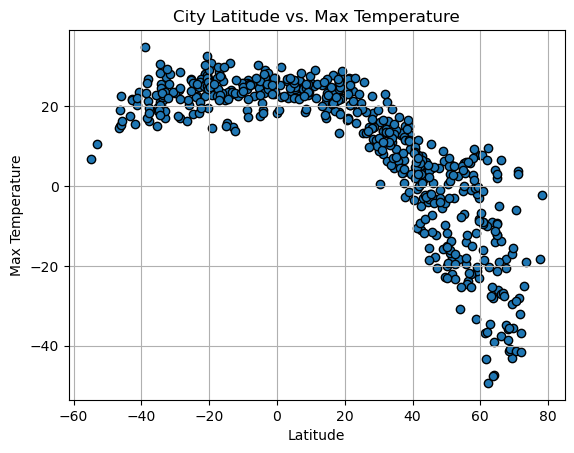

In [30]:
# Scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o', edgecolors='black')

# Other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.grid()

# Save the figure
plt.savefig("output_data/MaxTemp_Scatter.png")

# Show plot
plt.show()

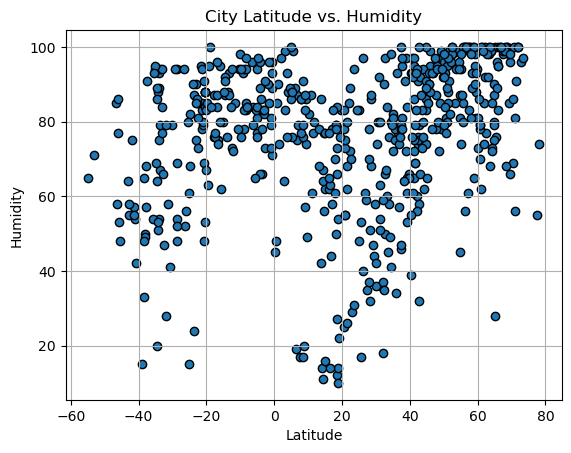

In [31]:
# Scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o', edgecolors='black')

# Other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

# Save the figure
plt.savefig("output_data/Humidity_Scatter.png")

# Show plot
plt.show()

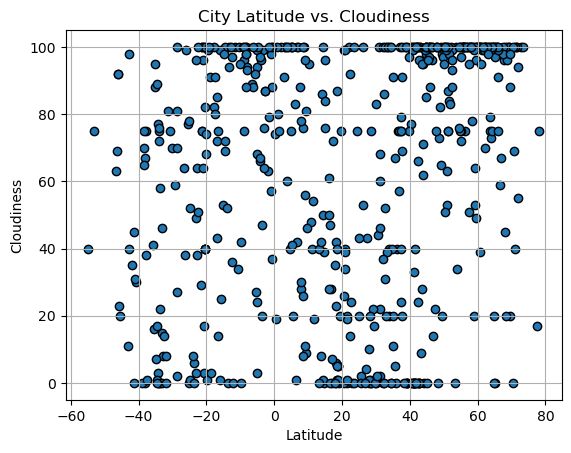

In [32]:
# Scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o', edgecolors='black')

# Other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

# Save the figure
plt.savefig("output_data/Clouds_Scatter.png")

# Show plot
plt.show()

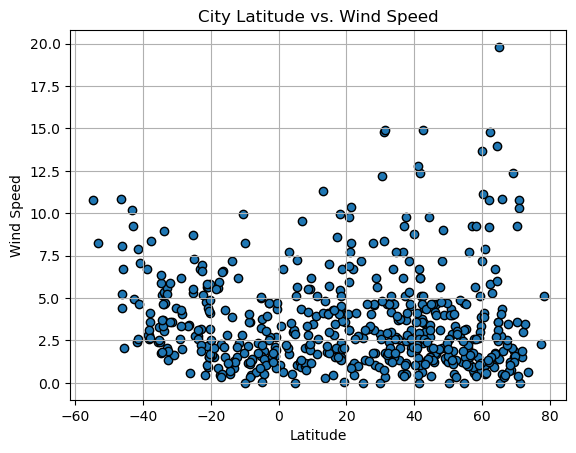

In [33]:
# Scatter plot for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o', edgecolors='black')

# Other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

# Save the figure
plt.savefig("output_data/WindSpeed_Scatter.png")

# Show plot
plt.show()

---

## Do these variables correlate? Linear Regression for each relationship

In [34]:
# Define Function to create linear regression plots
def my_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r-')
    print(f"The r-squared is: {rvalue**2}")


In [35]:
# Define function for annotating where the line equation will go
def my_annotation(line_eq, coord1, coord2):
    plt.annotate(line_eq,(coord1, coord2),fontsize=15,color="red")

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,santa cruz de tenerife,28.4682,-16.2546,15.40,86,0,1.79,ES,1675642722
8,sao filipe,14.8961,-24.4956,21.14,62,96,6.98,CV,1675642875
9,barrow,71.2906,-156.7887,-27.99,91,100,0.00,US,1675642876
10,norman wells,65.2820,-126.8329,-25.98,76,100,0.00,CA,1675642844
16,castlegar,49.2998,-117.6689,6.27,99,100,1.34,CA,1675642878


In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <=0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,punta arenas,-53.1500,-70.9167,10.62,71,75,8.23,CL,1675642456
1,karratha,-20.7377,116.8463,32.70,48,3,0.95,AU,1675642872
2,rikitea,-23.1203,-134.9692,26.13,75,3,6.69,PF,1675642799
3,hermanus,-34.4187,19.2345,21.00,88,77,5.18,ZA,1675642872
4,port elizabeth,-33.9180,25.5701,24.50,93,75,4.63,ZA,1675642824


The r-squared is: 0.721338647305414


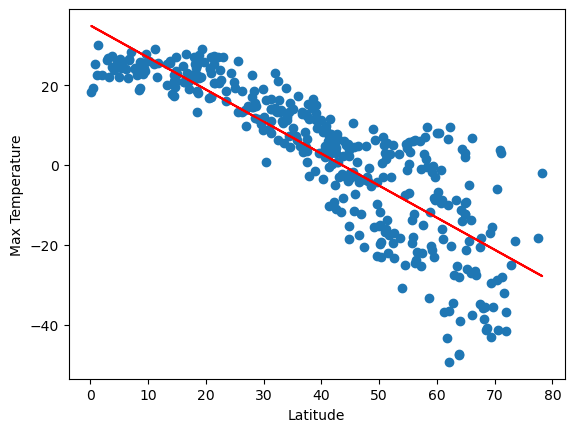

In [38]:
# Linear regression on Northern Hemisphere
my_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

# Other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()


---

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.1794525399991148


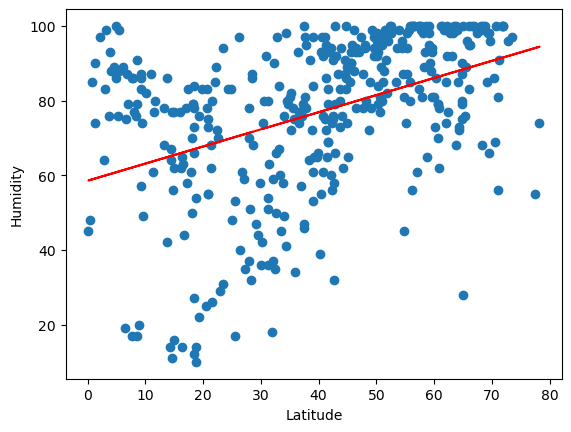

In [39]:
# Northern Hemisphere
my_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

# Other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-squared is: 0.20697022651716865


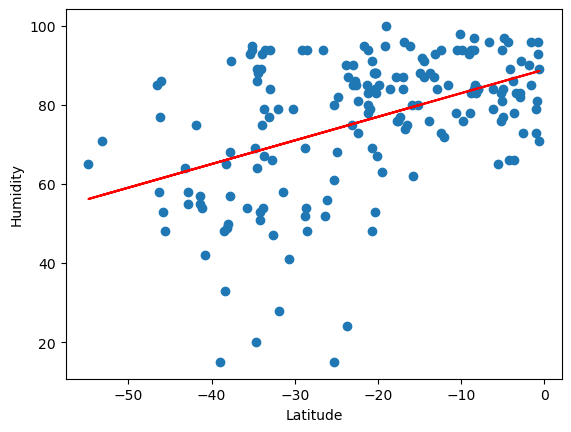

In [40]:
# Southern Hemisphere
my_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

# Other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

---

### Cloudiness vs. Latitude linear regression plot

The r-squared is: 0.12505030688338736


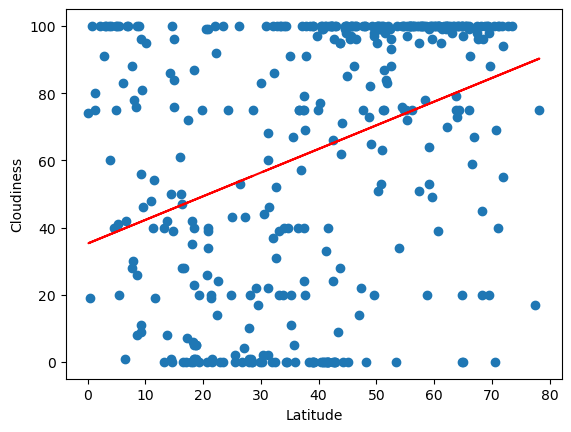

In [41]:
# Northern Hemisphere
my_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

# Other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-squared is: 0.135275107694953


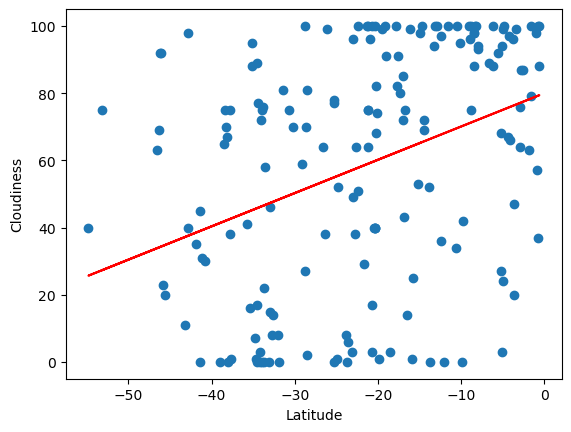

In [42]:
# Southern Hemisphere
my_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

# Other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

---

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 1.3892012817160121e-05


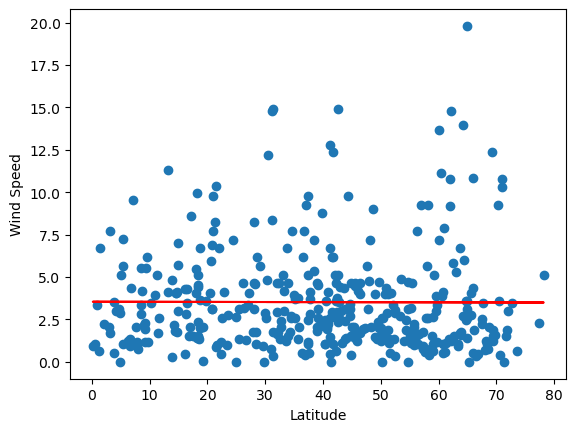

In [43]:
# Northern Hemisphere
my_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

# Other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()